Test imaging of single FITS files / explore data

In [1]:
import os
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from scipy.optimize import curve_fit
import glob
from astropy.time import Time
from datetime import datetime
from collections import defaultdict
from utils import *

crab_img_directories = ["../data/CrabIMG_FITS_3_15", "../data/CrabIMG_FITS_15_30", "../data/CrabIMG_FITS_30_60"]
jupiter_img_directories = ["../data/JupiterIMG_FITS_15_30", "../data/JupiterIMG_FITS_30_60"]

crab_files = [os.listdir(directory) for directory in crab_img_directories]
jupiter_files = [os.listdir(directory) for directory in jupiter_img_directories]

In [2]:
crab_coords = SkyCoord.from_name("Crab")
crab_ra, crab_dec = crab_coords.ra.deg, crab_coords.dec.deg

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
/tmp/ipykernel_73109/1656297790.py:9: RuntimeWarning: invalid value encountered in log10
  im = ax.imshow(np.log10(crab_img), cmap='viridis', origin='lower', aspect='equal')


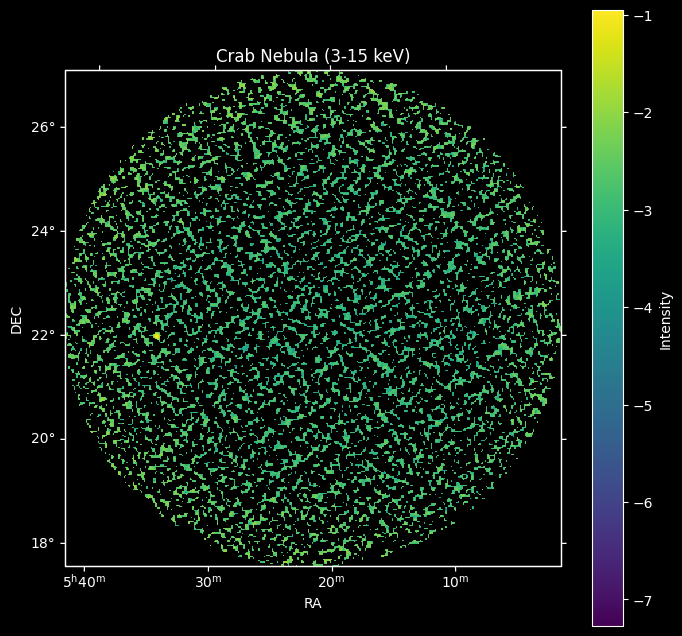

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54740.056146 from DATE-OBS.
Set MJD-END to 54740.078495 from DATE-END'. [astropy.wcs.wcs]
/tmp/ipykernel_73109/1656297790.py:9: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(crab_img), cmap='viridis', origin='lower', aspect='equal')
/tmp/ipykernel_73109/1656297790.py:9: RuntimeWarning: invalid value encountered in log10
  im = ax.imshow(np.log10(crab_img), cmap='viridis', origin='lower', aspect='equal')


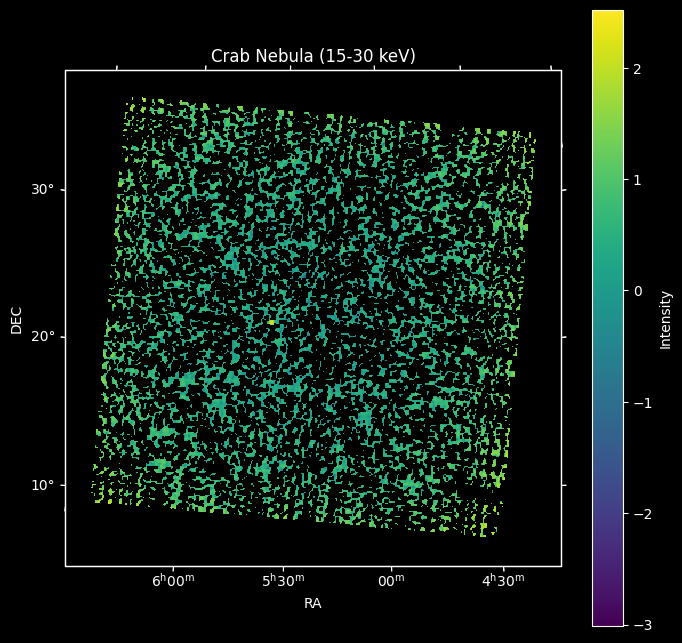

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54740.056146 from DATE-OBS.
Set MJD-END to 54740.078495 from DATE-END'. [astropy.wcs.wcs]
/tmp/ipykernel_73109/1656297790.py:9: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(crab_img), cmap='viridis', origin='lower', aspect='equal')
/tmp/ipykernel_73109/1656297790.py:9: RuntimeWarning: invalid value encountered in log10
  im = ax.imshow(np.log10(crab_img), cmap='viridis', origin='lower', aspect='equal')


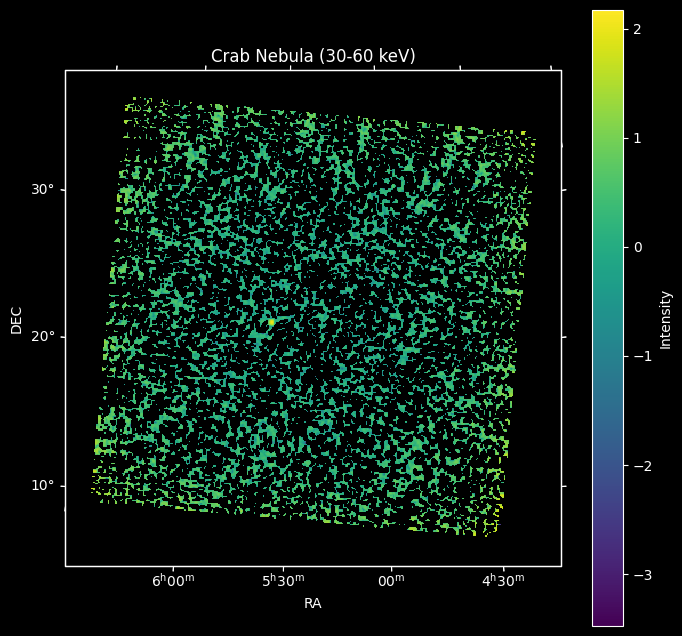

In [4]:
for i, directory in enumerate(crab_img_directories):
    with fits.open(os.path.join(directory, crab_files[i][-1])) as hdu:
        crab_img = hdu[2].data
        wcs = WCS(hdu[2].header)

    fig = plt.figure(figsize=(8, 8))
    plt.style.use('dark_background')
    ax = fig.add_subplot(111, projection=wcs)  # Create a new figure for each image with WCS projection
    im = ax.imshow(np.log10(crab_img), cmap='viridis', origin='lower', aspect='equal')

    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')
    if i == 0:
        E1, E2 = 3, 15
    elif i == 1:
        E1, E2 = 15, 30
    else:
        E1, E2 = 30, 60
    ax.set_title(f"Crab Nebula ({E1}-{E2} keV)")

    cbar = plt.colorbar(im, ax=ax, label="Intensity")
    
    plt.style.use('dark_background')
    plt.show()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 53754.569294 from DATE-OBS.
Set MJD-END to 53754.608993 from DATE-END'. [astropy.wcs.wcs]
/tmp/ipykernel_73109/3051432562.py:8: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(crab_img), cmap='viridis', origin='lower', aspect='equal')
/tmp/ipykernel_73109/3051432562.py:8: RuntimeWarning: invalid value encountered in log10
  im = ax.imshow(np.log10(crab_img), cmap='viridis', origin='lower', aspect='equal')


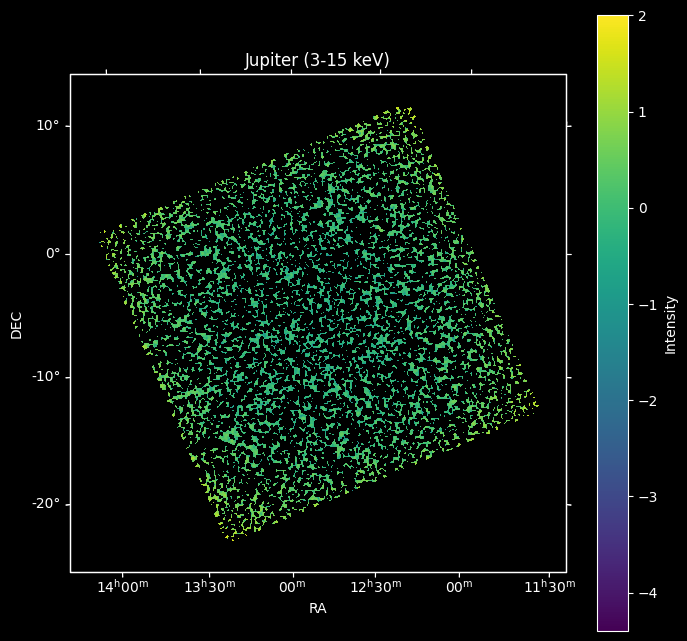

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 53754.569294 from DATE-OBS.
Set MJD-END to 53754.608993 from DATE-END'. [astropy.wcs.wcs]
/tmp/ipykernel_73109/3051432562.py:8: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(crab_img), cmap='viridis', origin='lower', aspect='equal')
/tmp/ipykernel_73109/3051432562.py:8: RuntimeWarning: invalid value encountered in log10
  im = ax.imshow(np.log10(crab_img), cmap='viridis', origin='lower', aspect='equal')


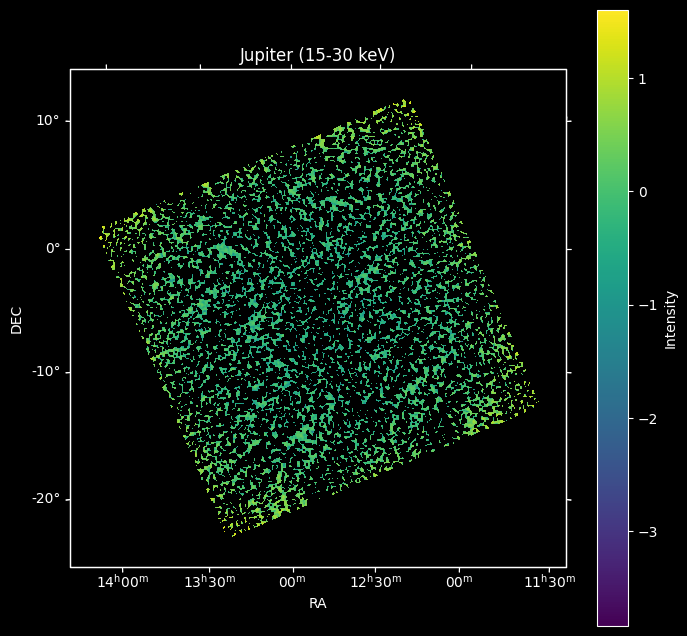

In [5]:
for i, directory in enumerate(jupiter_img_directories):
    with fits.open(os.path.join(directory, jupiter_files[i][0])) as hdu:
        crab_img = hdu[2].data
        wcs = WCS(hdu[2].header)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection=wcs)  # Create a new figure for each image with WCS projection
    im = ax.imshow(np.log10(crab_img), cmap='viridis', origin='lower', aspect='equal')

    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')
    if i == 0:
        E1, E2 = 3, 15
    elif i == 1:
        E1, E2 = 15, 30
    else:
        E1, E2 = 30, 60
    ax.set_title(f"Jupiter ({E1}-{E2} keV)")

    cbar = plt.colorbar(im, ax=ax, label="Intensity")
    
    plt.style.use('dark_background')
    plt.show()

Gaussian fitting

Set MJD-OBS to 54740.056146 from DATE-OBS.
Set MJD-END to 54740.078495 from DATE-END'. [astropy.wcs.wcs]


Crab single pixel count rate: 188.76 +/- 1.51
Crab PSF count rate using amplitude + position: 159.97 +/- 2.98
Crab PSF count rate using all parameters: 204.80 +/- 5.24


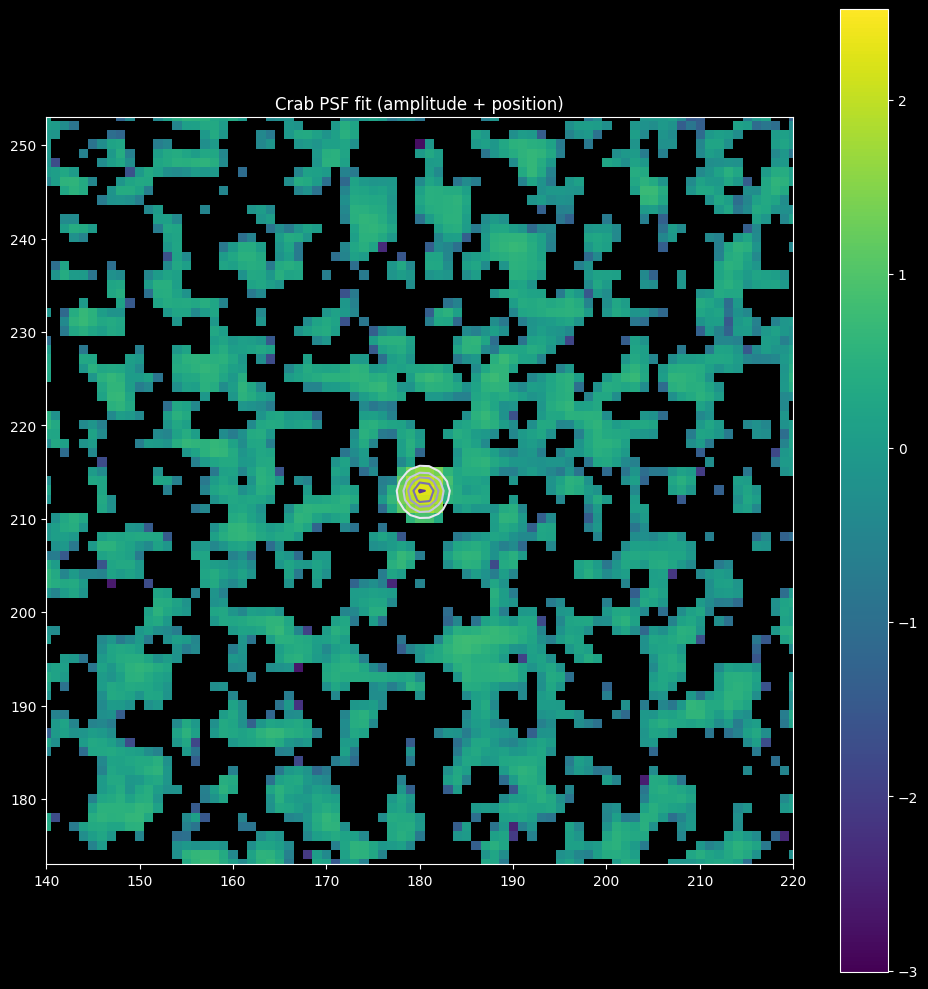

In [42]:
with fits.open(os.path.join(crab_img_directories[1], crab_files[0][-1])) as hdu:
    crab_img = hdu[2].data
    crab_var = hdu[3].data

    wcs = WCS(hdu[2].header)
    x, y = wcs.all_world2pix(crab_ra, crab_dec, 0)
    x_int, y_int = int(round(x.item())), int(round(y.item()))
    crab_countrate = crab_img[y_int, x_int]
    crab_variance = crab_var[y_int, x_int]
    
x = np.arange(0, crab_img.shape[1])
y = np.arange(0, crab_img.shape[0])
x, y = np.meshgrid(x, y)

def Gaussian2D_fixed(xy, amplitude, xo, yo):
    return Gaussian2D(xy, amplitude, xo, yo, np.sqrt(crab_variance), np.sqrt(crab_variance), 0, 0)

print(f"Crab single pixel count rate: {crab_countrate:.2f} +/- {np.sqrt(crab_variance):.2f}")

# Fit the data with the Gaussian2D model, fit only the amplitude and the position
from scipy.optimize import curve_fit
popt, pcov = curve_fit(Gaussian2D_fixed, (x, y), crab_img.ravel(), p0=[crab_countrate, x_int, y_int])# , sigma=np.sqrt(var_data.ravel())
popt2, pcov2 = curve_fit(Gaussian2D, (x, y), crab_img.ravel(), p0=[crab_countrate, x_int, y_int,  np.sqrt(crab_variance),  np.sqrt(crab_variance), 0, 0])
crab_psf_countrate_fixed = popt[0]
crab_psf_countrate = popt2[0]
crab_psf_error_fixed = np.sqrt(np.diag(pcov))[0]
crab_psf_error = np.sqrt(np.diag(pcov2))[0]

print(f"Crab PSF count rate using amplitude + position: {crab_psf_countrate_fixed:.2f} +/- {crab_psf_error_fixed:.2f}")
print(f"Crab PSF count rate using all parameters: {crab_psf_countrate:.2f} +/- {crab_psf_error:.2f}")

# Plot the fit of the Gaussian2D model centered on the Crab
plt.figure(figsize=(10, 10))
plt.style.use('dark_background')
plt.imshow(np.log10(np.where(crab_img > 0, crab_img, np.nan)), cmap='viridis', origin='lower')
plt.colorbar()
plt.contour(x, y, Gaussian2D_fixed((x, y), *popt).reshape(crab_img.shape), cmap='Purples', levels=5)
# plt.contour(x, y, Gaussian2D((x, y), *popt2).reshape(crab_img.shape), cmap='Purples', levels=5)
plt.xlim(x_int-40, x_int+40)
plt.ylim(y_int-40, y_int+40)
plt.title("Crab PSF fit (amplitude + position)")
plt.tight_layout()

FITS file exploration

In [37]:
hdu = fits.open(os.path.join(crab_img_directories[0], crab_files[0][-1]))
hdu[2].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  369                                                  
NAXIS2  =                  369                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
BASETYPE= 'DAL_ARRAY'                                                           
BUNIT   = 'counts/cm2/s'                                                        
CD1_1   =               -0.026                                                  
CD1_2   =                  0.0                                                  
CD2_1   =                  0.0                                                  
CD2_2   =                0.0